In [3]:
%matplotlib inline

from lark import Lark, tree

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

### Zeroth-order logic

It is also called propositional logic, statement logic, sentential calculus, sentential logic, or sometimes zeroth-order logic. It deals with propositions (which can be true or false) and argument flow. Compound propositions are formed by connecting propositions by logical connectives. The propositions without logical connectives are called atomic propositions.

Unlike first-order logic, propositional logic does not deal with non-logical objects, predicates about them, or quantifiers. However, all the machinery of propositional logic is included in first-order logic and higher-order logics. In this sense, propositional logic is the foundation of first-order logic and higher-order logic.

###  Logic Symbols

__material implication (implies):__ A ⇒ B is true if and only if B can be true and A can be false but not vice versa.

__material equivalence (the same as):__ A ⇔ B is true only if bothA and B are false, or both A and B are true.

__negation (not):__ The statement ¬A is true if and only if {\displaystyle A} A is false.

__logical conjunction (and):__ The statement A ∧ B is true if A and B are both true; otherwise, it is false.

__logical disjunction (or):__ The statement A ∨ B is true if A or B (or both) are true; if both are false, the statement is false.

__exclusive disjunction (xor):__ The statement A ⊕ B is true when either A or B, but not both, are true. A ⊻ B means the same.

### First Grammar Symbols

__implies:__ ->  
__the same as:__ <->  
__negation:__ ~  
__logical conjunction:__ /\\  
__logical disjunction:__ \\/  
__exclusive disjunction:__ \\_/  

In [2]:
grammar = """
    start: complex_sentence

    ATOM: UCASE_LETTER+

    NEGATION: "~"
    
    TRUE: "TRUE"
    FALSE: "FALSE"
    boolean: TRUE | FALSE
        
    MATERIAL_IMPLICATION: "->"
    MATERIAL_EQUIVALENCE: "<->"
    
    LOGICAL_CONJUNCTION: "AND"
    LOGICAL_DISJUNCTION: "OR"
    EXCLUSIVE_DISJUNCTION: "XOR"
    
    connector: MATERIAL_IMPLICATION
               | MATERIAL_EQUIVALENCE
               | LOGICAL_CONJUNCTION
               | LOGICAL_DISJUNCTION
               | EXCLUSIVE_DISJUNCTION
               
    atomic_sentence: ATOM
                     | boolean
                     
    complex_sentence: atomic_sentence
                      | NEGATION complex_sentence
                      | complex_sentence connector complex_sentence
                      | "(" complex_sentence ")"
                      | "[" complex_sentence "]"
                      | "{" complex_sentence "}"
                  
    %import common.WS
    %import common.UCASE_LETTER
    
    %ignore WS
"""

In [3]:
prop_calc_parser = Lark(grammar, parser="earley")

perse = prop_calc_parser.parse(
    "([(A AND B) -> (C OR D)] AND [C <-> E] AND [~E OR ~D]) -> [A -> ~B]"
)

tree.pydot__tree_to_png(perse, "./Examples/arboles_de_forzamiento_semantico_manuel_sierra_1.png")

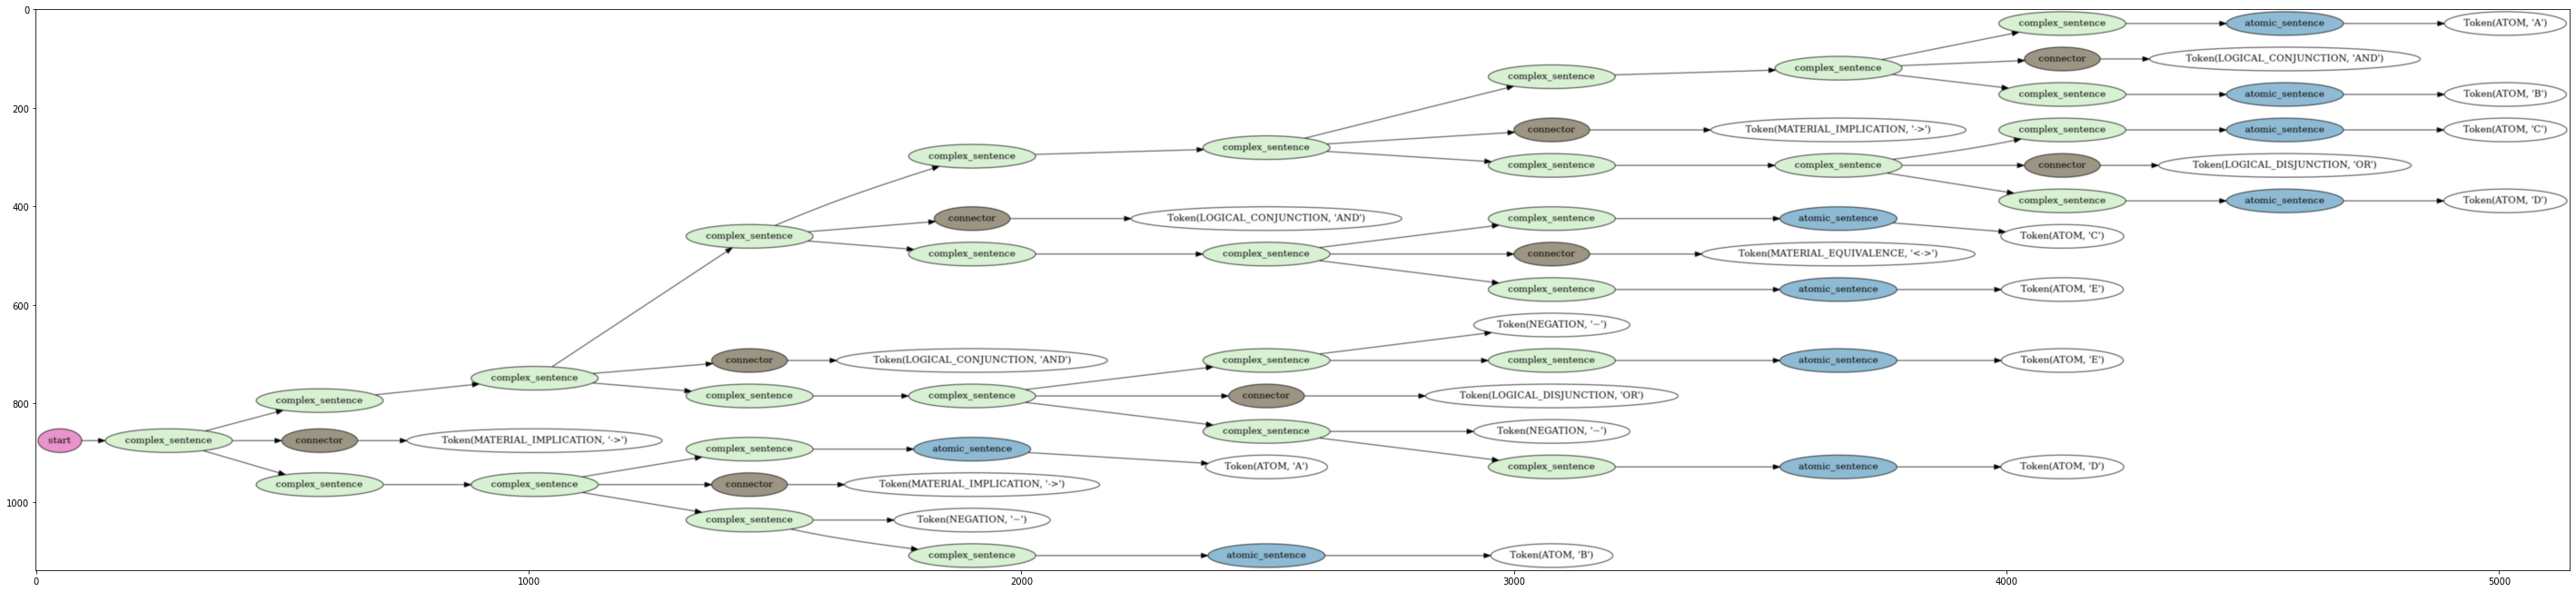

In [5]:
plt.rcParams['figure.figsize'] = (50, 60)

img = mpimg.imread(
    "./Examples/arboles_de_forzamiento_semantico_manuel_sierra_1.png"
)

_ = plt.imshow(img, interpolation="bicubic")

### Second Grammar Symbols

This grammar represents logical formulas as a collection of functions calling nested inside one and other

In [6]:
grammar = """
    start: complex_sentence

    ATOM: UCASE_LETTER+

    NEGATION: "not"
    
    TRUE: "TRUE"
    FALSE: "FALSE"
    boolean: TRUE | FALSE
        
    MATERIAL_IMPLICATION: "implication"
    MATERIAL_EQUIVALENCE: "equivalence"
    
    LOGICAL_CONJUNCTION: "and"
    LOGICAL_DISJUNCTION: "or"
    EXCLUSIVE_DISJUNCTION: "xor"

    connector: MATERIAL_IMPLICATION
               | MATERIAL_EQUIVALENCE
               | LOGICAL_CONJUNCTION
               | LOGICAL_DISJUNCTION
               | EXCLUSIVE_DISJUNCTION
               
    atomic_sentence: ATOM
                     | boolean
                     
    complex_sentence: atomic_sentence
                      | NEGATION "(" complex_sentence ")"
                      | connector "(" complex_sentence "," complex_sentence ")"

    %import common.WS
    %import common.UCASE_LETTER
    
    %ignore WS
"""

In [7]:
prop_calc_parser = Lark(grammar, parser="earley")

perse = prop_calc_parser.parse(
    r"""
    implication(
        and(
            implication(
                and(A, B), 
                or(C, D)
            ), 
            and(
                equivalence(C, E), 
                or(not(E), not(D))
            )
        ),
        implication(
            A, 
            not(B)
        )
    )
    """
)

tree.pydot__tree_to_png(perse, "./Examples/arboles_de_forzamiento_semantico_manuel_sierra_2.png")

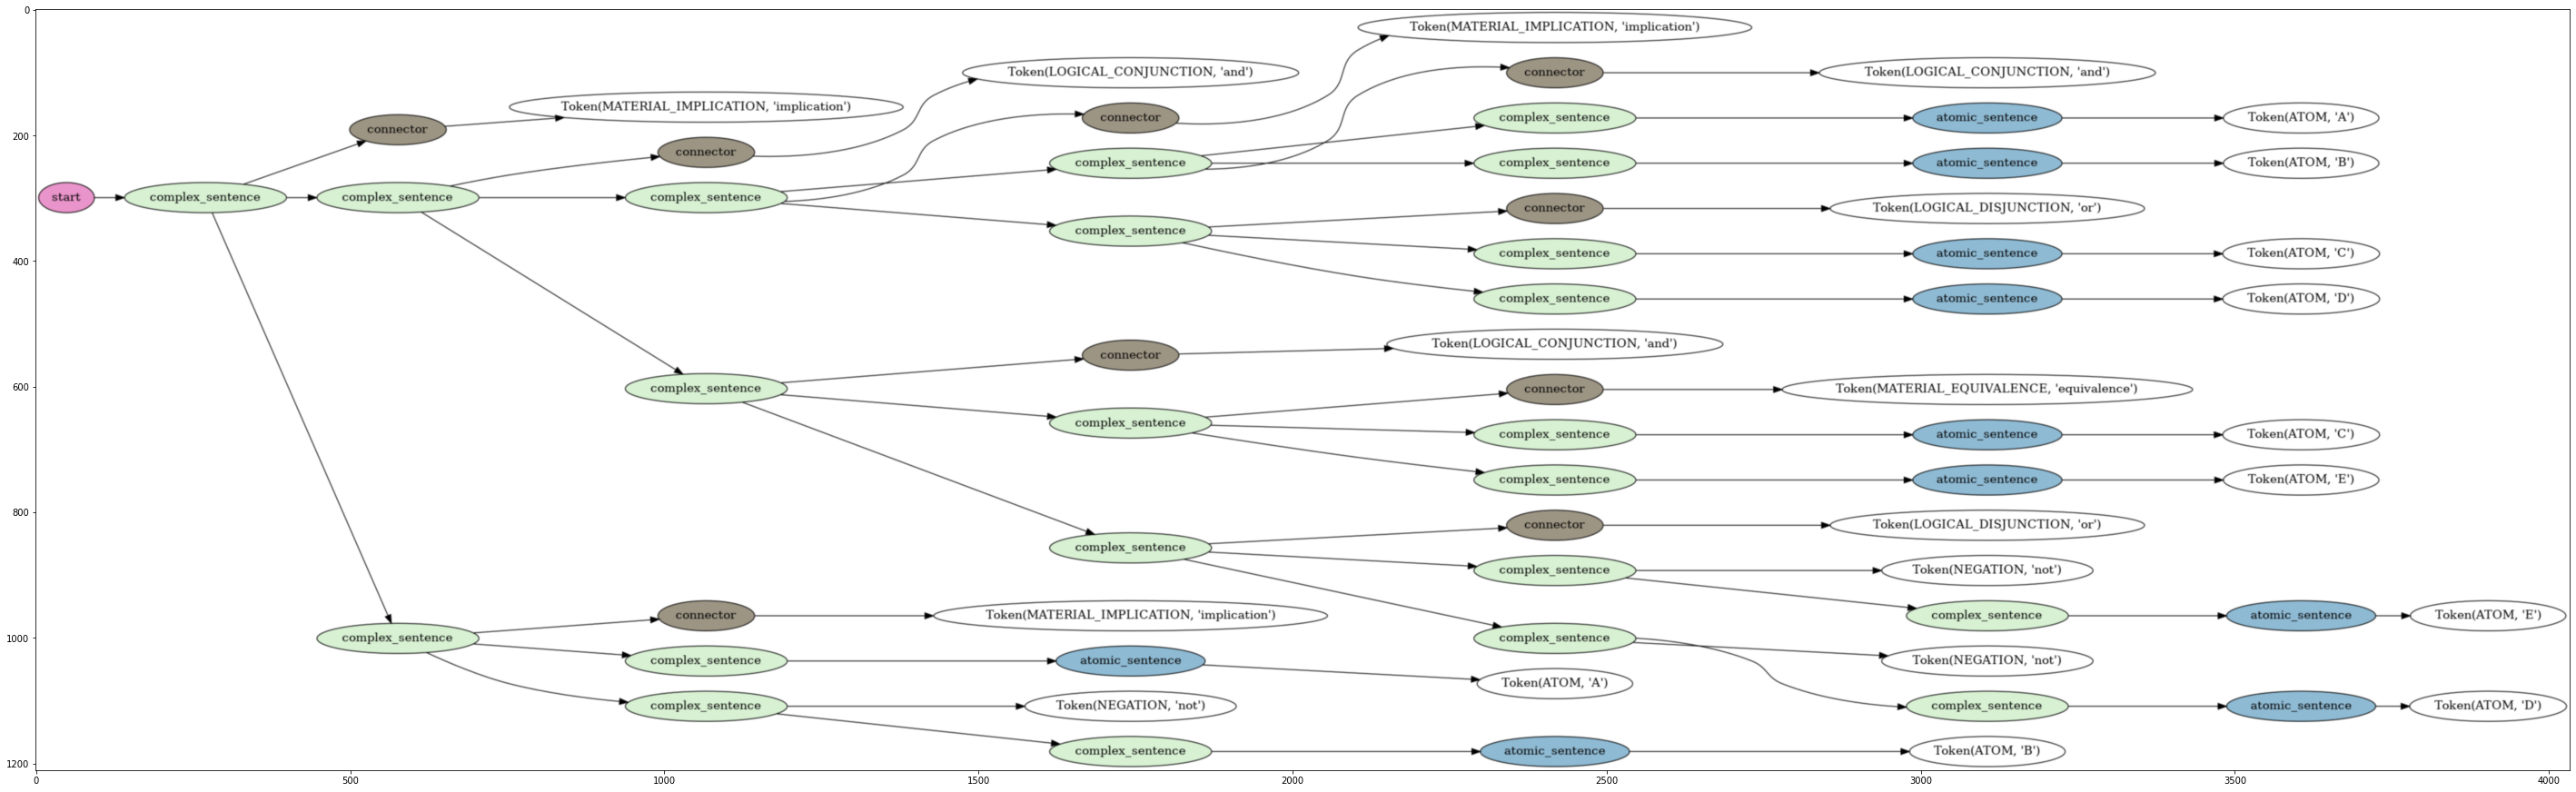

In [8]:
plt.rcParams['figure.figsize'] = (50, 60)

img = mpimg.imread(
    "./Examples/arboles_de_forzamiento_semantico_manuel_sierra_2.png"
)

_ = plt.imshow(img, interpolation="bicubic")

In [4]:
grammar = """
    start: complex_sentence

    ATOM: UCASE_LETTER+

    NEGATION: "¬"
    
    TRUE: "TRUE"
    FALSE: "FALSE"
    boolean: TRUE | FALSE
        
    MATERIAL_IMPLICATION: "→"
    MATERIAL_EQUIVALENCE: "↔"
    
    LOGICAL_CONJUNCTION: "∧"
    LOGICAL_DISJUNCTION: "∨"
    EXCLUSIVE_DISJUNCTION: "⊻"
    
    connector: MATERIAL_IMPLICATION
               | MATERIAL_EQUIVALENCE
               | LOGICAL_CONJUNCTION
               | LOGICAL_DISJUNCTION
               | EXCLUSIVE_DISJUNCTION
               
    atomic_sentence: ATOM
                     | boolean
                     
    complex_sentence: atomic_sentence
                      | NEGATION complex_sentence
                      | complex_sentence connector complex_sentence
                      | "(" complex_sentence ")"
                      | "[" complex_sentence "]"
                      | "{" complex_sentence "}"
                  
    %import common.WS
    %import common.UCASE_LETTER
    
    %ignore WS
"""

In [5]:
prop_calc_parser = Lark(grammar, parser="earley")

perse = prop_calc_parser.parse(
    "([(A ∧ B) → (C ∨ D)] ∧ [C ↔ E] ∧ [¬E ∨ ¬D]) → [A → ¬B]"
)

tree.pydot__tree_to_png(perse, "./Examples/arboles_de_forzamiento_semantico_manuel_sierra_1.png")

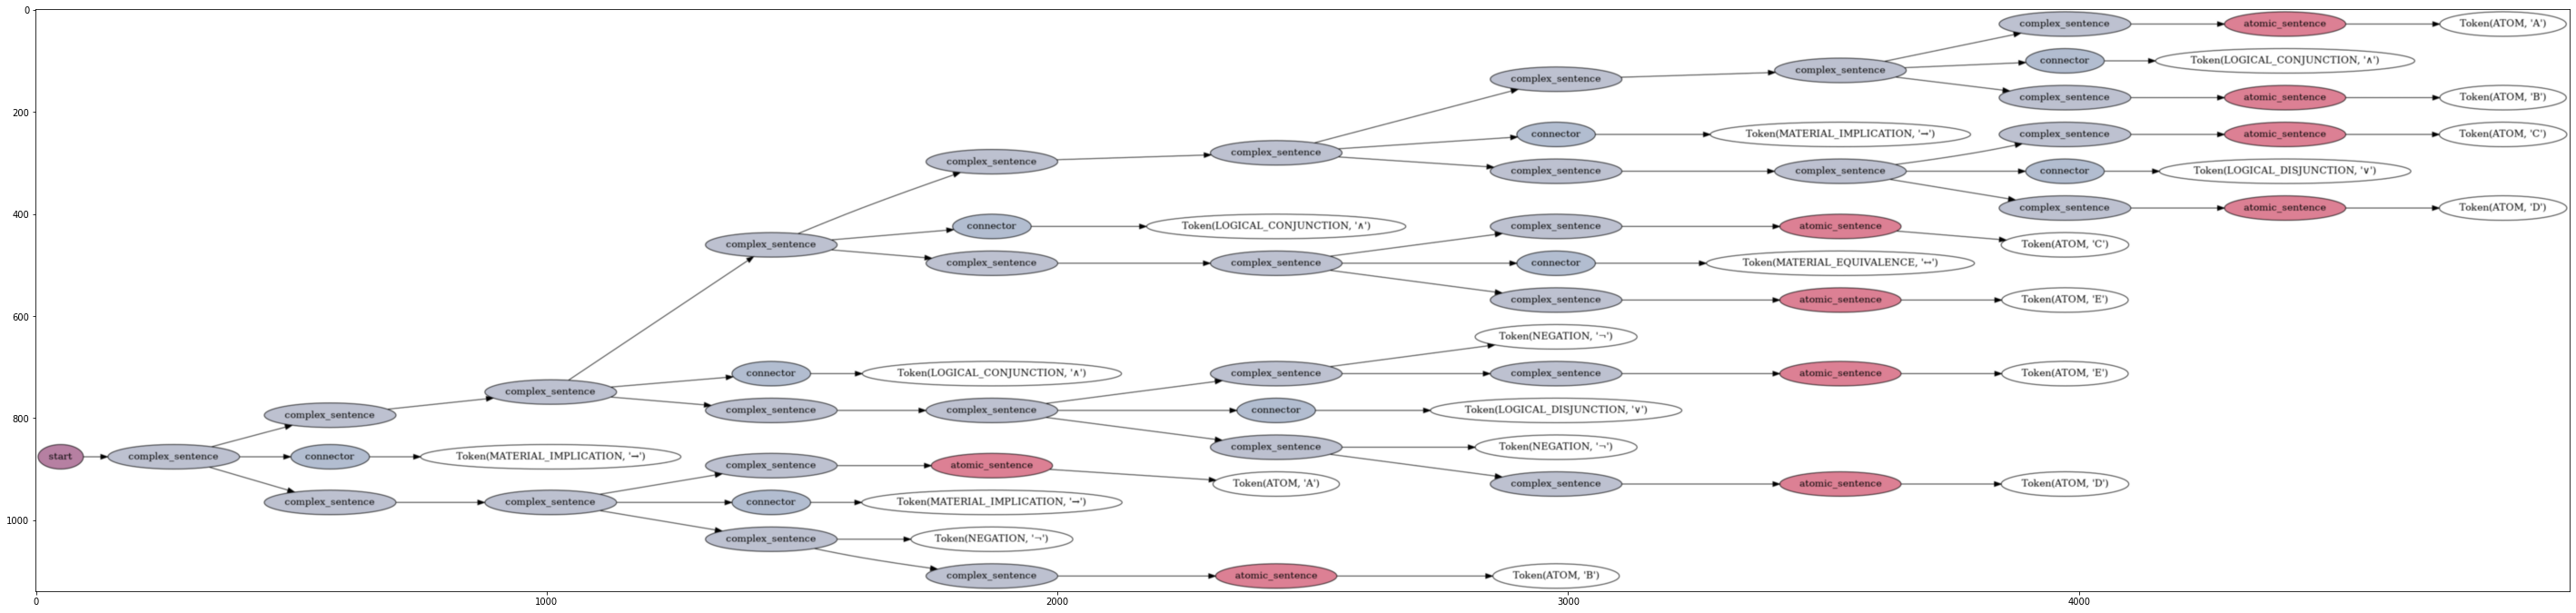

In [6]:
plt.rcParams['figure.figsize'] = (50, 60)

img = mpimg.imread(
    "./Examples/arboles_de_forzamiento_semantico_manuel_sierra_1.png"
)

_ = plt.imshow(img, interpolation="bicubic")